***Support Vector Machines***
    Using SVM with Python to predict whether a breast cancer tumor is malignant or benign. Exercise uses numpy, pandas, and scikitlearn and utilizes train test split, SVM, SVC,  and GridSearch to identify the best parameters for prediction.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

In [4]:
# 1 point

# import and load the breast cancer dataset 

# output a variable where the data is loaded straight from sklearn

cancer = datasets.load_breast_cancer()

In [5]:
assert cancer.data.shape == (569,30)

In [6]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [7]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
# 1 point

#load the data from the dataset into a pd df

#output a dataframe with the data of the dataset and the column names as feature names
#IT SHOULD NOT INCLUDE THE TARGET 

df_feat = pd.DataFrame(cancer.data,columns=cancer.feature_names)# 1 point

#load the data from the dataset into a pd df

#output a dataframe with the data of the dataset and the column names as feature names
#IT SHOULD NOT INCLUDE THE TARGET 

df_feat = pd.DataFrame(cancer.data,columns=cancer.feature_names)

In [9]:
b = True
for i in cancer['feature_names']:
    if df_feat[i].shape != (569,):
        b = False
        break
assert b

In [10]:
# 1 point

# create a dataframe with all the targets and the column name your be 'Cancer'
# output a single column dataframe
df_target = pd.DataFrame(cancer.target,columns=["Cancer"])

In [11]:
assert df_target['Cancer'].shape == (569,)

In [21]:
X,y = cancer.data,cancer.target

In [22]:
#1 point
# get the train test split, tested with random state 0 and test_size 0.2
# import if needed
# all the subsets should be numpy arrays
# TIP carefull with the shape of the Y
# YOUR CODE HERE
#raise NotImplementedError()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [24]:
assert X_train.shape == (455,30)
assert X_test.shape == (114,30)
assert y_train.shape == (455,)
assert y_test.shape == (114,)

In [25]:
# 2 points
#Train the support vector classifier
# import if needed

#clf = 0
# YOUR CODE HERE
#raise NotImplementedError()
clf = svm.SVC(kernel='rbf')
clf.fit(X_train,y_train)

SVC()

In [26]:
assert clf.support_vectors_.shape == (123,30)

In [27]:
# 3 points
# predict the testing data and get the accuracy
# import if needed
# output preds is the array with the predictions and acc is a float between 0 and 1
preds = 0
acc = 0
# YOUR CODE HERE
#raise NotImplementedError()
preds = clf.predict(X_test)
acc = metrics.accuracy_score(y_test,preds)


In [28]:
assert acc > 0.85
assert preds.shape == (114,)

***Everything is being classified into a single class! Use Grid Search to search for the best parameters! (Scikitlearn GridSearchCV)***


In [29]:
# 2 points
#Set parameters
# the parameters should be in a dict format
#params = {}
# YOUR CODE HERE
#raise NotImplementedError()
params = {'C': [1, 10, 100, 1000], 'kernel': ['linear','rbf']}

In [31]:
assert len(params) == 2
assert len(params['kernel']) == 2

In [33]:
#Fit grid (Note to self: first it runs the same loop with cross-validation to find the best parameter combination. Once it has the best combination, it runs fit again on all data passed to fit (without cross-validation), to built a single new model using the best parameter setting.)
# 4 points
# add an svm to the grid and train it
# the SVM should be an untrained one
# import if needed 
#svc = 0
#grid_clf = 0
# YOUR CODE HERE
#raise NotImplementedError()
grid_clf = GridSearchCV(svm.SVC(gamma="auto"),params,cv=5)
grid_clf.fit(X_train,y_train)
grid_clf.cv_results_


{'mean_fit_time': array([0.42219787, 0.00779934, 2.21199751, 0.01059728, 1.87440276,
        0.00840011, 3.98099995, 0.0084023 ]),
 'std_fit_time': array([2.74024529e-01, 3.97909149e-04, 1.50422509e+00, 1.36157510e-03,
        8.84586551e-01, 4.91228480e-04, 2.38777376e+00, 4.93249249e-04]),
 'mean_score_time': array([0.00020223, 0.00339832, 0.00020003, 0.00499926, 0.00040088,
        0.00359735, 0.00040007, 0.00360065]),
 'std_score_time': array([0.00040445, 0.0004901 , 0.00040007, 0.00063249, 0.00049109,
        0.00048921, 0.00048998, 0.00048992]),
 'param_C': masked_array(data=[1, 1, 10, 10, 100, 100, 1000, 1000],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf', 'linear', 'rbf',
                    'linear', 'rbf'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=

In [34]:
dic = grid_clf.get_params(deep=False)
assert type(dic['estimator']) == type(svm.SVC()) 
assert dic['pre_dispatch'] == '2*n_jobs'

In [35]:
# 2 point
#Get in a list the best parameters of the grid
#output python list with the best parameters sorted
#best_params = []
# YOUR CODE HERE
#raise NotImplementedError()
df=pd.DataFrame(grid_clf.cv_results_)
df


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.422198,0.274025,0.000202,0.000404,1,linear,"{'C': 1, 'kernel': 'linear'}",0.989011,0.967033,0.912088,0.967033,0.967033,0.960440,0.025631,1
1,0.007799,0.000398,0.003398,0.000490,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.637363,0.637363,0.637363,0.637363,0.637363,0.637363,0.000000,5
2,2.211998,1.504225,0.000200,0.000400,10,linear,"{'C': 10, 'kernel': 'linear'}",0.956044,0.956044,0.890110,0.956044,0.989011,0.949451,0.032301,3
3,0.010597,0.001362,0.004999,0.000632,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.637363,0.637363,0.637363,0.637363,0.637363,0.637363,0.000000,5
4,1.874403,0.884587,0.000401,0.000491,100,linear,"{'C': 100, 'kernel': 'linear'}",0.934066,0.967033,0.934066,0.945055,0.967033,0.949451,0.014906,3
5,0.008400,0.000491,0.003597,0.000489,100,rbf,"{'C': 100, 'kernel': 'rbf'}",0.637363,0.637363,0.637363,0.637363,0.637363,0.637363,0.000000,5
6,3.981000,2.387774,0.000400,0.000490,1000,linear,"{'C': 1000, 'kernel': 'linear'}",0.934066,0.967033,0.934066,0.967033,0.989011,0.958242,0.021308,2
7,0.008402,0.000493,0.003601,0.000490,1000,rbf,"{'C': 1000, 'kernel': 'rbf'}",0.637363,0.637363,0.637363,0.637363,0.637363,0.637363,0.000000,5


In [37]:
#assert best_params[0] == 'mean_fit_time'
#assert best_params[1] == 'mean_score_time'
#assert best_params[2] == 'mean_test_score'
#assert best_params[3] == 'param_C'

In [ ]:
# 5 points
# predict the testing set and get the accuracy
# accuracy as always will be between 0 and 1
preds = 0
acc = 0
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:

assert acc > 0.92
assert preds[preds.argmax()] == 1
assert preds.shape == (114,)

In [38]:
# 3 points
# get the confusion matrix
#import if needed
#conf_mat = []

# YOUR CODE HERE
#raise NotImplementedError()
clf = svm.SVC(kernel="linear",C=1)
clf.fit(X_train,y_train)
preds = clf.predict(X_test)
acc = metrics.accuracy_score(y_test,preds)


array([[46,  1],
       [ 4, 63]], dtype=int64)

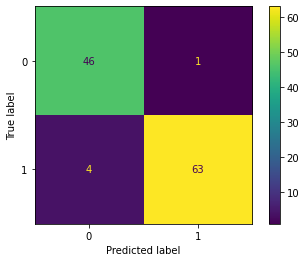

In [41]:
conf_mat = confusion_matrix(y_test,preds)
plot_confusion_matrix(clf,X_test,y_test)
conf_mat

In [40]:
#assert conf_mat.shape == (2,2)
#assert conf_mat[0][1] < 7
#assert conf_mat[1][0] < 3


# Discussion of results